In [1]:
#import needed libraries
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read each of the dataset provided
edstat_files=glob("Ed*.csv")
for i, f in enumerate(edstat_files):
    locals()["dataset"+str(i)] = pd.read_csv(f)

We are going to analyse the information we can get from the country dataset and clean them

In [3]:
#drop rows which does not correspond to any region
dataset1=dataset1.dropna(axis=0, subset=['Region'])

# Get information needed in the country dataset

country_info_cols=['Country Code','Region','Latest population census']

country_info=dataset1[country_info_cols]
print(country_info['Latest population census'].unique())

#change some of the census string provided into year 
country_info['Latest population census'].replace({"2011. Population figures compiled from administrative registers.":"2011",
                                                 "2006. Rolling census based on continuous sample survey.":"2006",
                                                 "2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.":"2011",
                                                 "Guernsey: 2009; Jersey: 2011.":"2010"},inplace=True)
country_info['Latest population census']=country_info['Latest population census'].astype(float)


['2010' '1979' '1970' '2011'
 '2011. Population figures compiled from administrative registers.' '2009'
 '2008' '2013' '2006' '2012' '2005' '2003' 'Guernsey: 2009; Jersey: 2011.'
 '1998' '1984' '2007' nan
 '2006. Rolling census based on continuous sample survey.' '2002' '1996'
 '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.'
 '1997' '2004' '1993' '1983' '1987' '2001' '1989']


C:\Users\kmall\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-3-3be0348b0861>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_info['Latest population census']=country_info['Latest population census'].astype(float)


From the above data we can see that there are some census that have been done many years ago and thus can not help much in today's decision making.
Thus I have decided that I am going to drop all data whose latest population census was done after 2000

In [4]:
new_dataset=dataset2.merge(country_info,on='Country Code',how='inner')
new_dataset=new_dataset[new_dataset['Latest population census']>=2000]

From the list of indicators, I have found that there are mainly 4 indicators which can be helpful in the Academy expansion decision making. These are the number of student in secondary level and those in tertial level,the access to computer and access to internet. 
Here below I am going to extract these rows and make them 4 dataframes then analyse each at once.

In [5]:
Indicators=['SE.SEC.ENRL','SE.TER.ENRL','IT.CMP.PCMP.P2','IT.NET.USER.P2']
#Create the 4 dataframes
inds=['secondary','tertiary','computer_access','internet_access']
for i, indicator in enumerate(Indicators):
    locals()["new_dataset_"+str(inds[i])]=new_dataset[new_dataset['Indicator Code']== indicator]
    print(inds[i],": ")
    print(locals()["new_dataset_"+str(inds[i])].shape)
    print(locals()["new_dataset_"+str(inds[i])].info())
    print("*******************************************************************************************")

secondary : 
(199, 72)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 4856 to 781836
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              199 non-null    object 
 1   Country Code              199 non-null    object 
 2   Indicator Name            199 non-null    object 
 3   Indicator Code            199 non-null    object 
 4   1970                      43 non-null     float64
 5   1971                      138 non-null    float64
 6   1972                      135 non-null    float64
 7   1973                      130 non-null    float64
 8   1974                      126 non-null    float64
 9   1975                      125 non-null    float64
 10  1976                      135 non-null    float64
 11  1977                      128 non-null    float64
 12  1978                      123 non-null    float64
 13  1979                      122 non-nu

internet_access : 
(199, 72)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 5040 to 782020
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              199 non-null    object 
 1   Country Code              199 non-null    object 
 2   Indicator Name            199 non-null    object 
 3   Indicator Code            199 non-null    object 
 4   1970                      7 non-null      float64
 5   1971                      0 non-null      float64
 6   1972                      0 non-null      float64
 7   1973                      0 non-null      float64
 8   1974                      0 non-null      float64
 9   1975                      7 non-null      float64
 10  1976                      7 non-null      float64
 11  1977                      7 non-null      float64
 12  1978                      7 non-null      float64
 13  1979                      7 no

From the analysis above, we can see that each dataset comprise of 199 rows and 62 columns. In general non null values available are up to 2016 and from 2000 the number of null values seems to decrease.
However, for the computer access, data are very less so I decided to give up on that dataframe.
So now we are going to get the 3 datasets with the range between 2000 and 2016.

Now I want to check which region has more potential customers. to do so I grouped by Region and get the mean for each region for each year. then find descriptive statistics for each region. finally I will sort the values with reference to the mean to see which regions have high potential.

In [6]:
Regions=new_dataset_secondary.Region.unique()
columns=['Country Name','Region','2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']
display('Regional secondary enrolment comparison:',new_dataset_secondary[columns].groupby('Region').mean().transpose().describe().transpose().sort_values(by=['mean','max'],ascending=False))
display("Regional tertiary enrolment comparison:",new_dataset_tertiary[columns].groupby('Region').mean().transpose().describe().transpose().sort_values(by=['mean','max'],ascending=False))
display("Regional internet access comparison:",new_dataset_internet_access[columns].groupby('Region').mean().transpose().describe().transpose().sort_values(by=['mean','max'],ascending=False))


'Regional secondary enrolment comparison:'

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
South Asia,17.0,2.642554e+07,1.007446e+07,3.277231e+06,2.348801e+07,2.615156e+07,2.854452e+07,4.909505e+07
North America,16.0,1.041543e+07,3.343480e+06,4.040000e+03,8.949391e+06,1.157312e+07,1.222678e+07,1.369417e+07
East Asia & Pacific,17.0,6.177307e+06,2.482855e+06,1.351000e+03,5.872542e+06,6.844164e+06,7.761825e+06,9.147145e+06
Latin America & Caribbean,17.0,1.803264e+06,3.917394e+05,9.259980e+05,1.789097e+06,1.849999e+06,1.998240e+06,2.397908e+06
Middle East & North Africa,17.0,1.656002e+06,5.077755e+05,6.128400e+04,1.515465e+06,1.794077e+06,1.916803e+06,2.177733e+06
Europe & Central Asia,17.0,1.542402e+06,1.271163e+05,1.282128e+06,1.466429e+06,1.548253e+06,1.642889e+06,1.781798e+06
Sub-Saharan Africa,17.0,9.718743e+05,2.566564e+05,5.881579e+05,7.922492e+05,9.478902e+05,1.199178e+06,1.364900e+06


'Regional tertiary enrolment comparison:'

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,16.0,1.154007e+07,3.332261e+06,7.207520e+06,9.445220e+06,1.010070e+07,1.417868e+07,1.727204e+07
South Asia,16.0,5.051033e+06,2.180144e+06,3.074316e+06,3.498158e+06,4.062181e+06,6.051116e+06,1.095358e+07
East Asia & Pacific,16.0,2.687026e+06,9.510507e+05,1.147420e+06,2.026949e+06,2.719546e+06,3.171494e+06,4.498985e+06
Latin America & Caribbean,16.0,7.898819e+05,1.975303e+05,5.502507e+05,6.063221e+05,7.845701e+05,9.007122e+05,1.220037e+06
Europe & Central Asia,17.0,7.070088e+05,1.059360e+05,4.353130e+05,6.528040e+05,7.324504e+05,7.706101e+05,8.442915e+05
Middle East & North Africa,16.0,6.089543e+05,1.887910e+05,3.050505e+05,4.591551e+05,5.901339e+05,7.252125e+05,9.155427e+05
Sub-Saharan Africa,17.0,9.990376e+04,5.033936e+04,2.895630e+04,6.214100e+04,9.649976e+04,1.410709e+05,2.106779e+05


'Regional internet access comparison:'

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
North America,17.0,72.708038,12.787872,45.776341,63.901696,77.666667,82.999768,88.005579
Europe & Central Asia,17.0,50.013440,18.259095,17.408497,37.706466,51.287358,65.337477,75.324433
Middle East & North Africa,17.0,29.869738,19.003186,4.788670,12.597919,28.793053,47.797297,58.935069
East Asia & Pacific,17.0,29.417460,12.140523,11.074606,20.817113,27.390865,37.696534,50.565055
Latin America & Caribbean,17.0,29.191801,16.530583,5.181012,15.271396,27.795254,43.083940,55.996939
South Asia,17.0,11.130078,10.778977,0.675908,2.302736,7.360000,16.924143,33.399850
Sub-Saharan Africa,17.0,8.017137,6.813013,0.978789,2.843616,5.492718,11.976134,22.284017


From the above descriptive statistics, we can seen that South Asia and North America are pocessing a high number of potential customers.
However South Asia countries do not access internet as much as North America. From that we can think of starting expansion in North America.

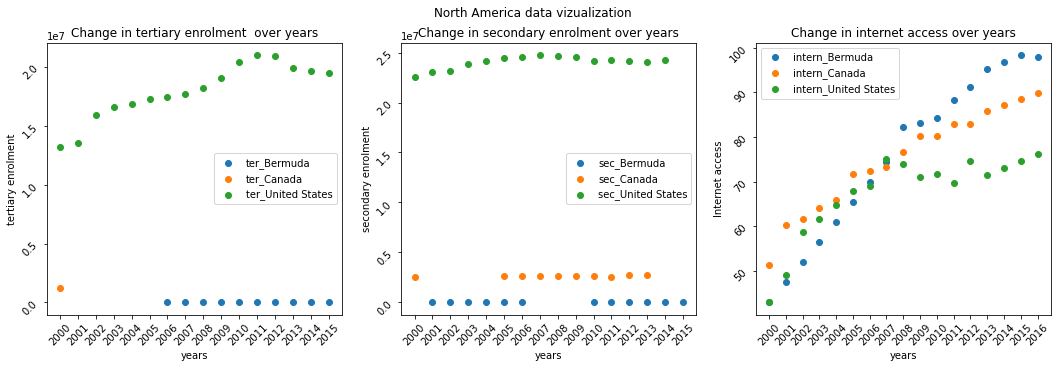

In [7]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3=fig.add_subplot(133)

columns=['Country Name','2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016']

second_clean=new_dataset_secondary[new_dataset_secondary['Region']=='North America'][columns].set_index('Country Name').transpose()
tertiary_clean=new_dataset_tertiary[new_dataset_tertiary['Region']=='North America'][columns].set_index('Country Name').transpose()
intern_clean=new_dataset_internet_access[new_dataset_internet_access['Region']=='North America'][columns].set_index('Country Name').transpose()
datasets=['second_clean','tertiary_clean','intern_clean']

for i in second_clean.columns:
    ax1.scatter(tertiary_clean[i].index,tertiary_clean[i],label="ter_"+str(i))

for i in second_clean.columns:
    ax2.scatter(second_clean[i].index,second_clean[i],label="sec_"+str(i))

for i in intern_clean.columns:
    ax3.scatter(intern_clean[i].index,intern_clean[i],label='intern_'+str(i))
    
    
fig.suptitle("North America data vizualization")
ax1.set_title('Change in tertiary enrolment  over years')

ax1.set_xlabel('years')
ax1.set_ylabel('tertiary enrolment')
ax1.legend()
ax1.tick_params(labelrotation=45)

ax2.set_title('Change in secondary enrolment over years')
ax2.set_xlabel('years')
ax2.set_ylabel('secondary enrolment')
ax2.legend()
ax2.tick_params(labelrotation=45)

ax3.set_title('Change in internet access over years')
ax3.set_xlabel('years')
ax3.set_ylabel('Internet access')
ax3.legend()
ax3.tick_params(labelrotation=45)

From the figure above we can see that the united states of America has a very high number of potential customers even though it's access to the internet 
is lower compared to the other but still it is clearly increase and high enough.

Concluding, it is clear that the datasets we have have few and not current data and thus difficult to decide from these.
However if we were to decide from these, United states would be the best to start with for expansion of academy.
I recommend that other sources of data can be used to validate this conclusion.